# **Clause-Aware RAG** - for RBI Master Circulars

System that understands and preserves legal/logical units of meaning instead of arbitrary text chunks.

In [1]:
%pip install "unstructured[all-docs]"

Note: you may need to restart the kernel to use updated packages.


e:\The Leo Programmer\Gen-AI Developer\Learning Projects\RBI - Master Circulars\.venv\Scripts\python.exe: No module named pip


In [2]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the unstructured library

from unstructured.chunking.title import chunk_by_title
from unstructured.partition.md import partition_md
from unstructured.partition.pdf import partition_pdf
from unstructured.staging.base import dict_to_elements

In [4]:
# Watermark = Secret invisible signature in AI-generated text

%pip install watermark

%load_ext watermark
%watermark --iversions

Note: you may need to restart the kernel to use updated packages.
unstructured: 0.18.31



e:\The Leo Programmer\Gen-AI Developer\Learning Projects\RBI - Master Circulars\.venv\Scripts\python.exe: No module named pip


## **Data Ingestion Pipeline**  - Knowledge Base Construction Layer

- Data ingestion layer is responsible for converting raw documents into structured, semantically meaningful, and traceable chunks that can be reliably used by retrieval and generation systems.

- Data ingestion includes document loading, parsing, cleaning, chunking, and metadata enrichment — and ends before embeddings are created.

**Knowledge Base Constructor:**
“The component that defines and builds structured knowledge units from raw documents.”

**Ingestion Pipeline:**
“The sequence of processing steps that transforms raw data into a searchable knowledge base.”

```
PDF
 ↓
Ingestion Pipeline
 (extract elements)
 ↓
[Raw Elements]
 ↓
Knowledge Base Constructor
 (group + chunk + structure)
 ↓
[Clause Knowledge Units]
 ↓
Embedding + Storage
```


In [5]:
# PDF Files Path

from pathlib import Path

pdf_dir = Path("../data/pdfs")
pdf_files = list(pdf_dir.glob("*.pdf"))
pdf_files

[WindowsPath('../data/pdfs/Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs).pdf'),
 WindowsPath('../data/pdfs/Master Circular - Credit facilities to Scheduled Castes (SCs) & Scheduled Tribes.pdf'),
 WindowsPath('../data/pdfs/Master Circular - Disbursement of Government Pension by Agency Banks.pdf'),
 WindowsPath('../data/pdfs/Master Circular - Exposure Norms and Statutory or Other Restrictions - UCBs.pdf'),
 WindowsPath('../data/pdfs/Master Circular - Guarantees and Co-acceptances.pdf'),
 WindowsPath('../data/pdfs/Master Circular - Guarantees, Co-acceptances & Letters of Credit - UCBs.pdf'),
 WindowsPath('../data/pdfs/Master Circular - Housing Finance for UCBs.pdf'),
 WindowsPath('../data/pdfs/Master Circular - Income Recognition, Asset Classification, Provisioning and Other.pdf'),
 WindowsPath('../data/pdfs/Master Circular - Management of Advances - UCBs.pdf'),
 WindowsPath('../data/pdfs/Master Circular - Prudential Norms on Capital Adequacy - Primary (Urban) 

**Level 1 — Native detection:**

In [6]:
# PDF Files Loading and Partitioning - Extract images, tables, and chunk text

from unstructured.partition.pdf import partition_pdf

all_elements = []

for pdf_path in pdf_files:
    elements = partition_pdf(
        filename=str(pdf_path),
        extract_images_in_pdf=False,
        #strategy = "hi_res",
        strategy = "fast",
        hi_res_model_name="yolox",
        infer_table_structure=True,
        chunking_strategy="by_title",
        max_characters=3000,
        #new_after_n_chars=3800,
        combine_text_under_n_chars=200,
        #extract_image_block_output_dir=path,
    )

    # Attach source metadata manually (VERY IMPORTANT)
    for el in elements:
        el.metadata.source = pdf_path.name

    all_elements.extend(elements)

In [8]:
# Display first 3 elements

all_elements[:3]

In [9]:
# Create a dictionary to store counts of each type
category_counts = {}

for element in all_elements:
    category = str(type(element))
    if category in category_counts:
        category_counts[category] += 1
    else:
        category_counts[category] = 1

# Unique_categories will have unique elements
unique_categories = set(category_counts.keys())
category_counts

{"<class 'unstructured.documents.elements.CompositeElement'>": 2632}

In [10]:
element_dict = [el.to_dict() for el in all_elements]

unique_types = set()

for item in element_dict:
    unique_types.add(item['type'])

print(unique_types)

{'CompositeElement'}


In [14]:
all_elements[0].to_dict()

{'type': 'CompositeElement',
 'element_id': '24476d0c8168291b24240941ab1d4e4b',
 'text': 'भारतीय �रज़वर् बैंक RESERVE BANK OF INDIA\n\nRBI/2025-26/15 DOR.CRE.REC.No.05/21.04.172/2025-26\n\nApril 01, 2025\n\nAll Scheduled Commercial Banks (excluding RRBs)\n\nMadam/ Dear Sir,\n\nMaster Circular - Bank Finance to Non-Banking Financial Companies (NBFCs)\n\nPlease refer to our Master Circular DOR.CRE.REC.No.17/21.04.172/2024-25 dated\n\nApril 24, 2024 on the captioned subject. Attached is the revised Master Circular,\n\nupdated to reflect all instructions issued as on date on the above matter, as listed in\n\nthe Annex. It may be noted that this Master Circular only consolidates all instructions',
 'metadata': {'file_directory': '..\\data\\pdfs',
  'filename': 'Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs).pdf',
  'last_modified': '2026-02-06T10:54:39',
  'page_number': 1,
  'orig_elements': 'eJzlV11v2zYU/SuEn1YgZMRvsm/5KhAMTQun20tTBBQ/Em2yZEhyl7TYf98lHSOpmw0NsOTB

In [13]:
print(all_elements[0].to_dict()['text'])

भारतीय �रज़वर् बैंक RESERVE BANK OF INDIA

RBI/2025-26/15 DOR.CRE.REC.No.05/21.04.172/2025-26

April 01, 2025

All Scheduled Commercial Banks (excluding RRBs)

Madam/ Dear Sir,

Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs)

Please refer to our Master Circular DOR.CRE.REC.No.17/21.04.172/2024-25 dated

April 24, 2024 on the captioned subject. Attached is the revised Master Circular,

updated to reflect all instructions issued as on date on the above matter, as listed in

the Annex. It may be noted that this Master Circular only consolidates all instructions


In [16]:
all_elements[1].to_dict()

{'type': 'CompositeElement',
 'element_id': '662e58d8b05ad73ec67121ebef27082c',
 'text': 'Withdrawn\n\non the above matter issued up to March 31, 2025 and does not contain any new\n\ninstructions/guidelines.\n\nYours faithfully,\n\n(Vaibhav Chaturvedi)\n\nChief General Manager\n\nEncl: as above.\n\nिविनयमन िवभाग, क��ीय कायार्लय, क��ीय कायार्लय भवन, 12व�/ 13व� मंिज़ल, शहीद भगत �संह मागर्, फोटर्, मु\n\nंबई - 400001\n\nटेलीफोन/ Tel No: 022-2260 1000 फैक्स/ Fax No: 022-2270 5691 Department of Regulation, Central Office, Central Office Building, 12th/ 13th Floor, Shahid Bhagat Singh Marg, Fort, Mumbai – 400001',
 'metadata': {'file_directory': '..\\data\\pdfs',
  'filename': 'Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs).pdf',
  'last_modified': '2026-02-06T10:54:39',
  'page_number': 1,
  'orig_elements': 'eJzlWN9v2zYQ/lcIP7WAqfCnSOYx2bKndMOabRiaIqBIyiImS4ZMp82K/e87Ss6iJR6QAkseXD/I/I7H45Hf8XTUhy+L0IZ16NJN9ItTtPDa1E7KCptKWCwcg1YdPA41l8IaRYmrFku0WIdkvU0WxnxZuL4ffOx

*type: 'CompositeElement'*

What it means ?

A CompositeElement is:

A merged logical block created by Unstructured

Made from multiple low-level elements (text, titles, headers, etc.)

Think of it as:

“This looks like one coherent section, so I grouped it.”


- It already respects layout + proximity

- Much better than raw line-by-line text

- Ideal input to your knowledge constructor

For govt PDFs, this is gold because clauses + signatures + addresses often come together.

* orig_elements = forensic evidence of the original document layout

In [15]:
print(all_elements[1].to_dict()['text'])

Withdrawn

on the above matter issued up to March 31, 2025 and does not contain any new

instructions/guidelines.

Yours faithfully,

(Vaibhav Chaturvedi)

Chief General Manager

Encl: as above.

िविनयमन िवभाग, क��ीय कायार्लय, क��ीय कायार्लय भवन, 12व�/ 13व� मंिज़ल, शहीद भगत �संह मागर्, फोटर्, मु

ंबई - 400001

टेलीफोन/ Tel No: 022-2260 1000 फैक्स/ Fax No: 022-2270 5691 Department of Regulation, Central Office, Central Office Building, 12th/ 13th Floor, Shahid Bhagat Singh Marg, Fort, Mumbai – 400001


In [17]:
tables = [el for el in all_elements if el.category == "Table"]
tables

[]

In [19]:
titles = [el for el in all_elements if el.category == "Title"]
titles

[]

In [22]:
# Better approach - ALL elements for hybrid retrieval
for el in all_elements:
    print(f"{el.category:15} | Page {el.metadata.page_number} | {el.text[:30]}...")

CompositeElement | Page 1 | भारतीय �रज़वर् बैंक RESERVE BAN...
CompositeElement | Page 1 | Withdrawn

on the above matter...
CompositeElement | Page 1 | �हंदी आसान है, इसका �योग बढ़ाइए...
CompositeElement | Page 2 | Classification

A statutory gu...
CompositeElement | Page 2 | Application

To all Scheduled ...
CompositeElement | Page 3 | Bank Finance to NBFCs Register...
CompositeElement | Page 3 | Withdrawn

6.3 Restriction on ...
CompositeElement | Page 3 | Annex

3

DOR – MC – Bank Fina...
CompositeElement | Page 4 | National Housing Bank Act, 198...
CompositeElement | Page 4 | year.

b. 'Long term investmen...
CompositeElement | Page 4 | (HFC) registered under Section...
CompositeElement | Page 5 | provisions of paragraph 8 of t...
CompositeElement | Page 5 | them.

2.3 Banks may formulate...
CompositeElement | Page 5 | Withdrawn

In terms of “Master...
CompositeElement | Page 5 | etc.

4. Activities not eligib...
CompositeElement | Page 5 | (b) two wheeler and three whee...
Composit

*Level 1 — Native detection (best, but failed here)*

Title

Header

ListItem

NarrativeText

➡️ we don’t have this (everything is CompositeElement)

In [23]:
# Create proper chunks with metadata
chunks = []

for el in all_elements:
    chunk = {
        "content": el.text,
        "category": el.category,  # Title, Table, Text, etc.
        "page": el.metadata.page_number,
        "source": el.metadata.filename,
        "is_table": el.category == "Table",
        "table_html": el.metadata.text_as_html if el.category == "Table" else None
    }
    chunks.append(chunk)

print(f"---> {len(chunks)} chunks ready for BM25 + Semantic indexing")

---> 2632 chunks ready for BM25 + Semantic indexing


## **Clause-aware grouping logic**

In RBI / Govt circulars, a clause is not a heading.
A clause is a self-contained regulatory instruction or statement.

A clause usually:

Starts with a number / letter / roman numeral, OR

Starts with a regulatory trigger phrase

May span multiple paragraphs

May reference tables or annexures

So our retrievable unit = clause, not page, not paragraph.

```
Clause = {
    "clause_id": "auto-generated",
    "text": "...full clause text...",
    "page_start": int,
    "page_end": int,
    "source_file": str,
    "role": "content | header | footer | signature",
    "orig_element_ids": [...],
}
```

Element → Clause → Chunk → Vector DB → UI

In [26]:
# Data Cleaning - Removing noisy data.

def is_noise(el):
    text = el.text.strip().lower()

    if not text:
        return True

    noise_phrases = [
        "withdrawn",
    ]

    return any(p in text for p in noise_phrases)


clean_elements = [
    el for el in all_elements
    if not is_noise(el)
]

In [27]:
for el in clean_elements:
    md = el.metadata

    el._page = getattr(md, "page_number", None)
    el._source = getattr(md, "filename", None)
    el._category = type(el).__name__

In [28]:
clean_elements[:][0].to_dict()

{'type': 'CompositeElement',
 'element_id': '24476d0c8168291b24240941ab1d4e4b',
 'text': 'भारतीय �रज़वर् बैंक RESERVE BANK OF INDIA\n\nRBI/2025-26/15 DOR.CRE.REC.No.05/21.04.172/2025-26\n\nApril 01, 2025\n\nAll Scheduled Commercial Banks (excluding RRBs)\n\nMadam/ Dear Sir,\n\nMaster Circular - Bank Finance to Non-Banking Financial Companies (NBFCs)\n\nPlease refer to our Master Circular DOR.CRE.REC.No.17/21.04.172/2024-25 dated\n\nApril 24, 2024 on the captioned subject. Attached is the revised Master Circular,\n\nupdated to reflect all instructions issued as on date on the above matter, as listed in\n\nthe Annex. It may be noted that this Master Circular only consolidates all instructions',
 'metadata': {'file_directory': '..\\data\\pdfs',
  'filename': 'Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs).pdf',
  'last_modified': '2026-02-06T10:54:39',
  'page_number': 1,
  'orig_elements': 'eJzlV11P3DgU/SvWPG0lbOJvu29AqYRWpdXA7kupkD/Bu5lklGS60Gr/+9oeRtApuyrSwsP0

You’re not wrong. What you’re feeling right now is **the exact moment everyone hits when moving from “parsing text” → “building a knowledge system.”**
So let me reframe this cleanly, without code first, because **this is a design problem, not a regex problem**.

---

## First: the uncomfortable truth (and relief 😌)

> ❝ each pdf follows one one each thing right? ❞

**YES.**
Each RBI / Govt PDF **follows its own internal logic**, but **not a universal one**.

That means:

* ❌ You will **never** get one regex that “just works”
* ❌ You will **never** perfectly match what *you expect* vs what the PDF gives
* ✅ You **must design a representation that tolerates mess**

Once you accept this → things become much clearer.

---

## Why your understanding vs output feels “completely different”

Because right now you are thinking in **human-document terms**:

```
Document
 ├─ Section
 │   ├─ Subsection
 │   │   └─ Clause
```

But the PDF gives you **visual artifacts**, not semantics:

```
Lines
  → merged blocks
     → broken sentences
        → bilingual noise
```

So the goal is **NOT**:

> “Perfectly detect sections”

The goal is:

> **“Represent what we KNOW, and safely store what we DON’T”**

That’s the mindset shift 🔁

---

## So… how should you represent all of this?

### The correct answer: **Multi-layer representation**

Not one structure. **Layers.**

---

## 🔹 Layer 1: Document Identity (always stable)

Every chunk MUST know this.

```json
{
  "document_id": "RBI_MC_NBFC_2025",
  "title": "Master Circular - Bank Finance to NBFCs",
  "issued_by": "Reserve Bank of India",
  "date": "2025-04-01",
  "language": ["en", "hi"]
}
```

This layer **never depends on regex**.

---

## 🔹 Layer 2: Structural Guess (best effort, not perfect)

This is where your section logic lives.

```json
{
  "section_main": "4. Activities not eligible for Bank Credit",
  "section_sub": "4.1 The following activities undertaken by NBFCs",
  "confidence": 0.85
}
```

Important:

* This is **not truth**
* This is **your model’s interpretation**

That’s okay.

---

## 🔹 Layer 3: Raw Text Truth (never altered)

This is sacred.

```json
{
  "raw_text": "(i) Bills discounted / rediscounted by NBFCs..."
}
```

Even if structure is wrong, **text is always right**.

---

## 🔹 Layer 4: Position & Traceability (for UI + trust)

```json
{
  "page_start": 5,
  "page_end": 6,
  "line_indices": [142,143,144],
  "source_file": "RBI_MC_NBFC_2025.pdf"
}
```

This is what makes your system **credible**.

---

## 🔹 Layer 5: Semantic Tags (this replaces regex obsession)

Instead of asking:

> “Is this section detected correctly?”

Ask:

> “What is this ABOUT?”

Example:

```json
{
  "topics": [
    "NBFC credit restrictions",
    "Bank exposure limits",
    "Prohibited activities"
  ],
  "entities": ["NBFC", "RBI", "Banks"],
  "doc_type": "regulatory_guideline"
}
```

This is where **RAG actually shines**.

---

## The BIG idea (this is the answer you’re searching for)

### ❝ What is the better idea? ❞

👉 **Stop trying to perfectly mirror the PDF’s structure**
👉 **Start building a “semantic knowledge layer over messy text”**

That’s exactly how:

* LexisNexis
* Westlaw
* Bloomberg Law
* RBI internal systems

…work.

They all accept that **PDFs are liars** 😄

---

## Why regex feels “wrong” to you (and you’re right)

Regex is good for:

* numbering patterns
* bullet detection
* clause starts

Regex is BAD for:

* meaning
* hierarchy
* exceptions
* bilingual noise

So use regex only for **weak signals**, never as truth.

---

## The representation I recommend (final form)

Each chunk you store should look like this:

```json
{
  "content": "(i) Bills discounted / rediscounted by NBFCs...",
  "document": {
    "id": "RBI_MC_NBFC_2025",
    "title": "Master Circular - Bank Finance to NBFCs"
  },
  "structure": {
    "section_main": "4. Activities not eligible for Bank Credit",
    "section_sub": "4.1 The following activities undertaken by NBFCs",
    "confidence": 0.8
  },
  "location": {
    "page_start": 5,
    "page_end": 6
  },
  "tags": ["prohibited_activity", "credit_policy"],
  "language": "en"
}
```

If structure is wrong → **RAG still works**
If structure is right → **RAG becomes excellent**

That’s the balance.

---

## Final reassurance (important)

You are **not failing**.
You are **transitioning from “parser mindset” → “system designer mindset.”**

That confusion is a **good sign**.

**Level 2 — Heuristic detection (manual logic):**

We try to detect structure using:

Section numbers (1., 1.1, 7.3)

Keywords (Introduction, Purpose, Annex)

ALL CAPS lines

Short lines followed by long paragraphs

➡️ This is manual detection, not Unstructured

Level 3 — Blind splitting (last resort, but valid)

If even heuristics fail, then:

✔️ Split by:

Page

Character length (e.g. 1k–2k chars)

Paragraph boundaries

➡️ Let the LLM infer structure later

In [11]:
# Linearize text (keep pages)

lines = []

for el in clean_elements:
    for line in el.text.split("\n"):
        clean = line.strip()
        if clean:
            lines.append({
                "text": clean,
                "page": el.metadata.page_number,
                "source": el.metadata.filename
            })

In [12]:
lines[:5]

[{'text': 'Classification',
  'page': 2,
  'source': 'Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs).pdf'},
 {'text': 'A statutory guideline issued under Section 35A of Banking Regulation Act, 1949.',
  'page': 2,
  'source': 'Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs).pdf'},
 {'text': 'Previous guidelines',
  'page': 2,
  'source': 'Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs).pdf'},
 {'text': 'Master Circular DOR.CRE.REC.No.17/21.04.172/2024-25 dated April 24, 2024 on',
  'page': 2,
  'source': 'Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs).pdf'},
 {'text': '‘Bank Finance to Non-Banking Financial Companies (NBFCs).',
  'page': 2,
  'source': 'Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs).pdf'}]

In [13]:
# 2. Header detector function

import re

HEADER_REGEX = re.compile(r"^\d+(\.\d+)*\.?\s+")

KEYWORDS = {
    "introduction", "purpose", "application",
    "classification", "background",
    "annex", "definitions", "structure"
}

def is_header(line: str) -> bool:
    txt = line.strip()

    # numbered headings
    if HEADER_REGEX.match(txt):
        return True

    # keyword headings
    if txt.lower() in KEYWORDS:
        return True

    # ALL CAPS short lines
    if txt.isupper() and len(txt) < 120:
        return True

    return False

In [ ]:
# 3. Build sections incrementally

sections = []

current_section = {
    "title": "Preamble",
    "content": [],
    "page_start": None,
    "page_end": None,
    "source": None
}

for line in lines:
    if is_header(line["text"]):
        # close previous section
        if current_section["content"]:
            sections.append(current_section)

        # start new section
        current_section = {
            "title": line["text"],
            "content": [],
            "page_start": line["page"],
            "page_end": line["page"],
            "source": line["source"]
        }
    else:
        current_section["content"].append(line["text"])
        current_section["page_end"] = line["page"]
        current_section["source"] = line["source"]

# append last
if current_section["content"]:
    sections.append(current_section)

In [15]:
sections[:3]

[{'title': 'Classification',
  'content': ['A statutory guideline issued under Section 35A of Banking Regulation Act, 1949.',
   'Previous guidelines',
   'Master Circular DOR.CRE.REC.No.17/21.04.172/2024-25 dated April 24, 2024 on',
   '‘Bank Finance to Non-Banking Financial Companies (NBFCs).',
   'Bank Finance to NBFCs Registered with RBI',
   '3.',
   'Bank Finance to NBFCs not Requiring Registration',
   '4.',
   'Activities not Eligible for Bank Credit',
   '5.',
   'Bank Finance to Factoring Companies',
   '6.',
   'Other Prohibition on Bank Finance to NBFCs'],
  'page_start': 2,
  'page_end': 3,
  'source': 'Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs).pdf'},
 {'title': '6.2 Advances against collateral security of shares to NBFCs',
  'content': ['7.',
   '8.',
   'National Housing Bank Act, 1987, all Non-Banking Financial Companies including',
   'Housing Finance Companies have to be mandatorily registered with the Reserve Bank',
   'of India.'],
  

While working with RBI / Government PDFs, even though we attempted section-wise parsing, title detection, and regex-based header extraction, the results were unreliable and misleading.

Reasons:

Most content is extracted as CompositeElement

Headings are not consistently detected as Title

Layout cues (bold, numbering, alignment) are lost or mixed

Manual section detection mixes unrelated content

Forced hierarchy introduces artificial structure that does not truly exist in extracted text

Because of this, trying to:

detect headers

group by sections

infer sub-sections

creates more confusion than clarity.

Final Decision

Instead of forcing structure:

Keep Unstructured extraction as-is

Preserve natural reading order

Apply RecursiveCharacterTextSplitter for chunking

Attach strong metadata (source, page numbers, document name, year, regulator)

Let the LLM infer semantics at query time, rather than hard-coding structure during ingestion.

**Final Approach Summary:**

Weak structure → strong metadata + clean chunking

```
Unstructured → Recursive Splitter → Metadata-rich chunks → Vector DB → RAG
```

In [29]:
from langchain_core.documents import Document

documents = []

for el in clean_elements:
    text = el.text.strip()
    if not text:
        continue

    metadata = {
        "file_name": el.metadata.filename,
        "page_number": el.metadata.page_number,
        "element_type": el.category,
    }

    documents.append(
        Document(page_content=text, metadata=metadata)
    )

In [30]:
documents[:3]

[Document(metadata={'file_name': 'Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs).pdf', 'page_number': 1, 'element_type': 'CompositeElement'}, page_content='भारतीय �रज़वर् बैंक RESERVE BANK OF INDIA\n\nRBI/2025-26/15 DOR.CRE.REC.No.05/21.04.172/2025-26\n\nApril 01, 2025\n\nAll Scheduled Commercial Banks (excluding RRBs)\n\nMadam/ Dear Sir,\n\nMaster Circular - Bank Finance to Non-Banking Financial Companies (NBFCs)\n\nPlease refer to our Master Circular DOR.CRE.REC.No.17/21.04.172/2024-25 dated\n\nApril 24, 2024 on the captioned subject. Attached is the revised Master Circular,\n\nupdated to reflect all instructions issued as on date on the above matter, as listed in\n\nthe Annex. It may be noted that this Master Circular only consolidates all instructions'),
 Document(metadata={'file_name': 'Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs).pdf', 'page_number': 1, 'element_type': 'CompositeElement'}, page_content="�हंदी आसान है, इसका �य

In [31]:
# Group text by (file + page)

from collections import defaultdict

page_text_map = defaultdict(list)

for el in clean_elements:
    if not el.text.strip():
        continue

    key = (
        el.metadata.filename,
        el.metadata.page_number
    )

    page_text_map[key].append(el.text)

In [32]:
# Create page-level Documents

from langchain_core.documents import Document

page_documents = []

for (filename, page_no), texts in page_text_map.items():
    combined_text = "\n".join(texts)

    page_documents.append(
        Document(
            page_content=combined_text,
            metadata={
                "file_name": filename,
                "page_number": page_no
            }
        )
    )
page_documents[:3]

[Document(metadata={'file_name': 'Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs).pdf', 'page_number': 1}, page_content="भारतीय �रज़वर् बैंक RESERVE BANK OF INDIA\n\nRBI/2025-26/15 DOR.CRE.REC.No.05/21.04.172/2025-26\n\nApril 01, 2025\n\nAll Scheduled Commercial Banks (excluding RRBs)\n\nMadam/ Dear Sir,\n\nMaster Circular - Bank Finance to Non-Banking Financial Companies (NBFCs)\n\nPlease refer to our Master Circular DOR.CRE.REC.No.17/21.04.172/2024-25 dated\n\nApril 24, 2024 on the captioned subject. Attached is the revised Master Circular,\n\nupdated to reflect all instructions issued as on date on the above matter, as listed in\n\nthe Annex. It may be noted that this Master Circular only consolidates all instructions\n�हंदी आसान है, इसका �योग बढ़ाइए\n\nMaster Circular on Bank Finance to Non-Banking Financial Companies\n\n(NBFCs)\n\nPurpose\n\nTo lay down the Reserve Bank of India's regulatory policy regarding financing of\n\nNBFCs by banks."),
 Document(meta

In [33]:
# Chunking with overlap for better retrieval - BM25 + Semantic

from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
    separators=["\n\n", "\n", ". ", " "]
)

chunked_documents = splitter.split_documents(page_documents)

In [34]:
chunked_documents[:3]

[Document(metadata={'file_name': 'Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs).pdf', 'page_number': 1}, page_content="भारतीय �रज़वर् बैंक RESERVE BANK OF INDIA\n\nRBI/2025-26/15 DOR.CRE.REC.No.05/21.04.172/2025-26\n\nApril 01, 2025\n\nAll Scheduled Commercial Banks (excluding RRBs)\n\nMadam/ Dear Sir,\n\nMaster Circular - Bank Finance to Non-Banking Financial Companies (NBFCs)\n\nPlease refer to our Master Circular DOR.CRE.REC.No.17/21.04.172/2024-25 dated\n\nApril 24, 2024 on the captioned subject. Attached is the revised Master Circular,\n\nupdated to reflect all instructions issued as on date on the above matter, as listed in\n\nthe Annex. It may be noted that this Master Circular only consolidates all instructions\n�हंदी आसान है, इसका �योग बढ़ाइए\n\nMaster Circular on Bank Finance to Non-Banking Financial Companies\n\n(NBFCs)\n\nPurpose\n\nTo lay down the Reserve Bank of India's regulatory policy regarding financing of\n\nNBFCs by banks."),
 Document(meta

In [38]:
len(chunked_documents)

1818

## 1: `clean_elements`

You already have:

* each `el.text`
* `el.metadata.page_number`
* `el.metadata.filename`

---

### 2: Converted elements → **page-level Documents**

You either already did this or are about to:

```python
from langchain_core.documents import Document

page_docs = []

for el in clean_elements:
    text = el.text.strip()
    if not text:
        continue

    page_docs.append(
        Document(
            page_content=text,
            metadata={
                "file_name": el.metadata.filename,
                "page_number": el.metadata.page_number,
            }
        )
    )
```

👉 **Important mental model**

```
1 Document = 1 page
```

So memory looks like:

```
page_docs = [
  Document(page=1, text=900 chars),
  Document(page=2, text=500 chars),
  Document(page=3, text=1100 chars),
  ...
]
```

No merging. No mixing.

---

## RecursiveCharacterTextSplitter (DRY RUN)

### Splitter config

```python
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
)
```

⚠️ **1000 = characters**, NOT tokens
(This is good for PDFs. Tokens are model-dependent.)

---

## DRY RUN (exactly what happens)

### INPUT

```
page_docs
```

---

### Page 1

```
page_content length = 900 chars
```

* 900 < 1000
* No split

✅ Output:

```
Chunk 1:
  content = page1 full text
  metadata = {page_number: 1}
```

---

### Page 2

```
page_content length = 500 chars
```

* 500 < 1000
* No split

✅ Output:

```
Chunk 2:
  content = page2 full text
  metadata = {page_number: 2}
```

---

### Page 3

```
page_content length = 1100 chars
```

* 1100 > 1000
* Split happens **inside the page**

#### Chunk math:

```
chunk_size = 1000
overlap = 200
```

So:

#### Chunk 3-A

```
chars 0 → 1000
page_number = 3
```

#### Chunk 3-B

```
chars 800 → 1100
page_number = 3
```

✅ Output:

```
Chunk 3:
  page=3
  length=1000

Chunk 4:
  page=3
  length=300
```

---

## Final output after splitter

```python
chunked_docs = splitter.split_documents(page_docs)
```

Memory now:

```
[
  (page=1, chunk),
  (page=2, chunk),
  (page=3, chunk),
  (page=3, chunk),
  ...
]
```

✔ Page numbers preserved
✔ File name preserved
✔ Highlighting possible
✔ Retrieval clean

---

## Absolutely crucial clarification

### ❌ This NEVER happens:

```
Page 1 + Page 2 → same chunk
```

### ❌ This NEVER happens:

```
Overlap pulls text from previous page
```

### ✅ Overlap ONLY works inside the same page

---

## Why Recursive Splitter still matters (even page-level)

Because:

* Some pages are huge (tables, annexures)
* LLM context efficiency
* Better semantic retrieval
* Safer highlighting

---

## Visual summary (stick this in your head)

```
PDF
 └── Page
     └── Document
         └── Chunk(s)
```

Never:

```
Chunk → Page → Document
```


**Before:**

```
PDF
 └── One giant text
      ├── chunk 1
      ├── chunk 2
      ├── chunk 3
```

**Now:**

```
PDF
 ├── Page 1 (Document)
 │     ├── chunk 1
 │
 ├── Page 2 (Document)
 │     ├── chunk 2
 │
 ├── Page 3 (Document)
 │     ├── chunk 3
 │     └── chunk 4
```

## **Indexing Pipeline (Hybrid Indexing):**

Hybrid indexing combines dense semantic vectors with deterministic metadata to enable both meaning-based retrieval and source-level traceability.

```
[ Page Level - Chunked Documents ]
        |
        |  (text + metadata)
        v
[ Chunk Units ]
  - chunk_text
  - file_name
  - page_start / page_end
  - element_type
        |
        |-----------------------------|
        |                             |
        v                             v
[ Dense Embedding Model ]     [ Metadata Indexing ]
(semantic vectors)            (filterable fields)
        |                             |
        |                             |
        |-------------+---------------|
                      |
                      v
            [ Hybrid Vector Store ]
              - Embeddings (dense)
              - Metadata (structured)
              - Chunk text
                      |
                      v
              [ Persisted Index ]
```

In [37]:
# 1. Generate embeddings and index in ChromaDB - Semantic Embeddings

from langchain_ollama import OllamaEmbeddings
from langchain_chroma import Chroma

print("Generating embeddings and indexing...")

embeddings = OllamaEmbeddings(
    model="nomic-embed-text"
)

vectorstore = Chroma.from_documents(
    documents=chunked_documents,
    embedding=embeddings,
    persist_directory="./chroma_db",
    collection_name="rbi_master_circulars"
)

print("Indexing complete.")

Generating embeddings and indexing...
Indexing complete.


In [40]:
# 2. BM25 Retriever for keyword-based retrieval 

from langchain_community.retrievers import BM25Retriever

bm25_retriever = BM25Retriever.from_documents(
    chunked_documents,
    bm25_variant="plus",    
)

In [44]:
bm25_retriever

BM25Retriever(vectorizer=<rank_bm25.BM25Okapi object at 0x000001DDC1145280>)

In [50]:
bm25_retriever.k = 11
bm25_retriever.k

11

In [41]:
result = bm25_retriever.invoke("retrieval augmented generation")
result

[Document(metadata={'file_name': 'Master Circular – Lead Bank Scheme.pdf', 'page_number': 28}, page_content='accordingly value chain needs to be developed for those high value crops.\n\nCreation of a Start-up Ecosystem in agriculture and allied sector.\n\nPromotion of organic farming in the country.\n\niii. Needless to emphasize that acceleration in income generation is significantly\n\ndependent on better capital formation in agriculture. Towards this, banks should revisit\n\ntheir documentation for crop loans, simplify them where required and ensure speedy'),
 Document(metadata={'file_name': 'Master Circular on Conduct of Government Business by Agency Banks - Payment of Agency Commission.pdf', 'page_number': 4}, page_content='4\n\ngenerated electronically and submitted to agency bank along with cash / instrument should be treated as transaction under physical mode.\n\n15. With reference to the implementation of GST regime, it is advised that a single Common Portal Identification Numb

*BM25 does not require persistence. The sparse index is built in-memory from the same chunked documents and executed at query time. Only dense embeddings (Chroma) are stored on disk.*

**Decision Table:**

| Question type        | Retrieval |
| -------------------- | --------- |
| Exact fact           | Lexical   |
| Numbers / tables     | Lexical   |
| Laws / policies      | Lexical   |
| Headings / titles    | Lexical   |
| Open-ended           | Semantic  |
| Explanatory          | Semantic  |
| User unsure of terms | Semantic  |
| Research / discovery | Semantic  |

**What is RRF?**

RRF = Reciprocal Rank Fusion

* ---> It is a ranking-level fusion technique
* ---> It does NOT use scores
* ---> It only uses positions (ranks)

```
[ Hybrid Vector Store ]
  - Dense embeddings
  - Chunk text
  - Metadata (file_name, page, type)
        |
        |  (Index ready)
        v
================================================
              QUERY TIME
================================================
        |
        v
[ User Query ]
        |
        |-------------------------------|
        |                               |
        v                               v
[ Sparse Retrieval ]             [ Dense Retrieval ]
(BM25 on chunk text)             (Vector similarity)
        |                               |
        |  ranked docs                  |  ranked docs
        v                               v
            [ Candidate Lists ]
                 (Top-N each)
                        |
                        v
            [ Reciprocal Rank Fusion ]
                (rank-based merge)
                        |
                        v
              [ Unified Ranked Chunks ]
                        |
                        v
                  [ Re-Ranking ]
                  (Cross-encoder)
                        |
                        v
                [ Final Top-K Context ]
                        |
                        v
                     [ LLM ]
```

In [51]:
# Vector Retriever for semantic search

vectorstore_retriever = vectorstore.as_retriever(
    search_type="similarity",   # or "mmr"
    search_kwargs={
        "k": 11
    }
)

- *BM25 is in-memory sparse search*

- *Vector DB needs a retriever wrapper because it’s a storage engine*

In [ ]:
# Hybrid Retrieval - Combine BM25 + Semantic - deduplication using hashing

import hashlib

def doc_hash(doc):
    return hashlib.md5(doc.page_content.encode("utf-8")).hexdigest()

*Hashing is used to generate a stable document identifier so that results returned independently by sparse and dense retrievers can be deduplicated and score-fused correctly during Reciprocal Rank Fusion.*

In [73]:
# Hybrid Retriever using RRF

class HybridRetriever:
    def __init__(self, bm25_retriever, vector_retriever, weights=[0.5, 0.5]):
        self.bm25_retriever = bm25_retriever
        self.vector_retriever = vector_retriever
        self.bm25_weight = weights[0]
        self.vector_weight = weights[1]

    def invoke(self, query, k=5):
        bm25_docs = self.bm25_retriever.invoke(query)
        vector_docs = self.vector_retriever.invoke(query)

        rrf_k = 60
        doc_scores = {}
        doc_map = {}

        # BM25
        for rank, doc in enumerate(bm25_docs, 1):
            key = doc_hash(doc)
            doc_scores[key] = self.bm25_weight / (rrf_k + rank)
            doc_map[key] = doc

        # Vector
        for rank, doc in enumerate(vector_docs, 1):
            key = doc_hash(doc)
            score = self.vector_weight / (rrf_k + rank)
            doc_scores[key] = doc_scores.get(key, 0) + score
            doc_map[key] = doc

        ranked = sorted(doc_scores.items(), key=lambda x: x[1], reverse=True)
        return [doc_map[k] for k, _ in ranked[:k]]

# Create hybrid retriever
hybrid_retriever = HybridRetriever(
    bm25_retriever=bm25_retriever,
    vector_retriever=vectorstore_retriever,
    weights=[0.5, 0.5]
)

print("---> Hybrid Retriever is Ready...")

---> Hybrid Retriever is Ready...


**RE-RANKING (Stage-2 Retrieval)**

A reranking model — also known as a cross-encoder — is a type of model that, given a query and document pair, will output a similarity score. We use this score to reorder the documents by relevance to our query.

A two-stage retrieval system. The vector DB step will typically include a bi-encoder or sparse embedding model.
A two-stage retrieval system. The vector DB step will typically include a bi-encoder or sparse embedding model.
Search engineers have used rerankers in two-stage retrieval systems for a long time. In these two-stage systems, a first-stage model (an embedding model/retriever) retrieves a set of relevant documents from a larger dataset. Then, a second-stage model (the reranker) is used to rerank those documents retrieved by the first-stage model.

We use two stages because retrieving a small set of documents from a large dataset is much faster than reranking a large set of documents — we'll discuss why this is the case soon — but TL;DR, rerankers are slow, and retrievers are fast.

Why Rerankers?
If a reranker is so much slower, why bother using them? The answer is that rerankers are much more accurate than embedding models.

The intuition behind a bi-encoder's inferior accuracy is that bi-encoders must compress all of the possible meanings of a document into a single vector — meaning we lose information. Additionally, bi-encoders have no context on the query because we don't know the query until we receive it (we create embeddings before user query time).

On the other hand, a reranker can receive the raw information directly into the large transformer computation, meaning less information loss. Because we are running the reranker at user query time, we have the added benefit of analyzing our document's meaning specific to the user query — rather than trying to produce a generic, averaged meaning.

Rerankers avoid the information loss of bi-encoders — but they come with a different penalty — time.

A bi-encoder model compresses the document or query meaning into a single vector. Note that the bi-encoder processes our query in the same way as it does documents, but at user query time.
A bi-encoder model compresses the document or query meaning into a single vector. Note that the bi-encoder processes our query in the same way as it does documents, but at user query time.
When using bi-encoder models with vector search, we frontload all of the heavy transformer computation to when we are creating the initial vectors — that means that when a user queries our system, we have already created the vectors, so all we need to do is:

Run a single transformer computation to create the query vector.
Compare the query vector to document vectors with cosine similarity (or another lightweight metric).
With rerankers, we are not pre-computing anything. Instead, we're feeding our query and a single other document into the transformer, running a whole transformer inference step, and outputting a single similarity score.

A reranker considers query and document to produce a single similarity score over a full transformer inference step. Note that document A here is equivalent to our query.
A reranker considers query and document to produce a single similarity score over a full transformer inference step. Note that document A here is equivalent to our query.
Given 40M records, if we use a small reranking model like BERT on a V100 GPU — we'd be waiting more than 50 hours to return a single query result [3]. We can do the same in <100ms with encoder models and vector search.

In [54]:
from sentence_transformers import CrossEncoder

reranker = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2")

Loading weights: 100%|██████████| 105/105 [00:00<00:00, 384.69it/s, Materializing param=classifier.weight]                                    
BertForSequenceClassification LOAD REPORT from: cross-encoder/ms-marco-MiniLM-L-6-v2
Key                          | Status     |  | 
-----------------------------+------------+--+-
bert.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [74]:
def rerank_docs(query, docs, top_k=5):
    """
    query: str
    docs: List[Document]
    top_k: int
    """

    # Prepare (query, doc_text) pairs
    pairs = [(query, doc.page_content) for doc in docs]

    # Get relevance scores
    scores = reranker.predict(pairs)

    # Attach scores to docs
    scored_docs = list(zip(docs, scores))

    # Sort by score (descending)
    scored_docs.sort(key=lambda x: x[1], reverse=True)

    # Return top-k docs only
    return [doc for doc, score in scored_docs[:top_k]]

In [89]:
def build_structured_context(docs):
    context_blocks = []
    source_map = {}

    for i, doc in enumerate(docs, 1):
        metadata = doc.metadata

        document_name = metadata.get("file_name", "Unknown document")
        page_number = metadata.get("page_number", "N/A")

        context_blocks.append(
            f"""
[Source {i}]
Document: {document_name}
Page: {page_number}

Content:
{doc.page_content}
""".strip()
        )

        source_map[i] = {
            "file": document_name,
            "page": page_number
        }

    return "\n\n---\n\n".join(context_blocks), source_map

### **LLM Integration**

temperature = 0
→ Always pick highest-probability next token

top_p = 1
→ No token filtering

repeat_penalty = 1
→ No penalty for repetition

In [78]:
# LLM Integration

from langchain_ollama import OllamaLLM
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Initializing the Qwen2.5:1.5b model
llm = OllamaLLM(
    model="qwen2.5:1.5b",
    temperature=0.0,
    top_p=1.0
)

In [79]:
prompt_template = ChatPromptTemplate.from_template("""
You are a document-grounded research assistant.

You must answer the question using ONLY the information explicitly present
in the provided document context.

==============================
CRITICAL RULES (NON-NEGOTIABLE)
==============================

1. You MUST use ONLY the information stated verbatim in the context.
2. Do NOT use prior knowledge, external knowledge, assumptions, inference, or interpretation.
3. EVERY factual sentence MUST end with a citation in the exact format: [Source X].
4. If the question contains multiple sub-questions, ALL sub-questions MUST be answered.
5. If ANY sub-question is missing, unclear, or not explicitly answered in the context,
   you MUST refuse to answer entirely.

==============================
MANDATORY REFUSAL CONDITIONS
==============================

You MUST respond ONLY with ONE of the following sentences if the conditions apply:

- If any required information is missing or unclear:
  "I couldn’t find this information in the available documents."

- If the question contains multiple sub-questions and ANY part is not fully answered:
  "I could not find information related to this question according to the provided documents."

Do NOT add explanations.
Do NOT add citations.
Do NOT add summaries.

==============================
PROHIBITED BEHAVIOR
==============================

- Do NOT speculate, infer, or extrapolate.
- Do NOT restate or rephrase the question.
- Do NOT explain reasoning or decision-making.
- Do NOT summarize document structure or metadata.
- Do NOT include phrases such as:
  "it appears", "based on", "suggests", "indicates", or similar.
- Do NOT include a references list or source summary section.
- Do NOT repeat the context text verbatim beyond what is necessary to answer.

==============================
CONTEXT
==============================

Below are retrieved document sections.
Each section is identified by a unique source number.

{context}

==============================
QUESTION
==============================

{question}

==============================
ANSWER FORMAT
==============================

- Use bullet points only if the context explicitly lists items.
- Each sentence MUST end with one or more citations in the form [Source X].
- Do NOT include headings, explanations, or extra commentary.

==============================
ANSWER
==============================
""")

In [86]:
# RAG Chain - Retrieval + LLM with strict prompting and output parsing 

rag_chain = (
    prompt_template
    | llm
    | StrOutputParser()
)

In [93]:
def answer_query(
    query: str,
    *,
    hybrid_retriever,
    reranker,
    rag_chain,
    top_k_retrieval: int = 20,
    top_k_rerank: int = 5
):
    # 1. Hybrid retrieval
    candidate_docs = hybrid_retriever.invoke(
        query,
        k=top_k_retrieval
    )

    if not candidate_docs:
        return "I couldn’t find relevant information in the documents."

    # 2. Re-ranking
    reranked_docs = rerank_docs(
        query=query,
        docs=candidate_docs,
        top_k=top_k_rerank
    )

    if not reranked_docs:
        return "I found documents, but none were relevant after re-ranking."

    # 3. Structured context
    #print(reranked_docs[0].metadata)
    context_text, source_map = build_structured_context(reranked_docs)

    # 4. LLM answer
    response = rag_chain.invoke({
        "context": context_text,
        "question": query
    })

    return {
        "answer": response,
        "sources": source_map
    }

In [99]:
def ask_query(query):
    response = answer_query(
        query=query,
        hybrid_retriever=hybrid_retriever,
        reranker=reranker,
        rag_chain=rag_chain,
        top_k_retrieval=20,
        top_k_rerank=5
    )

    print("LLM Response:\n")
    print(response['answer'])

    print("\n\nSources cited in the answer:")
    for source_id in response['sources']:
        source_info = response['sources'][source_id]
        print(f"Source {source_id}: {source_info['file']} (Page {source_info['page']})")

In [100]:
ask_query("Graduation rates of Students with disabilities in higher education institutions")

LLM Response:

I couldn’t find information related to this question according to the provided documents.


Sources cited in the answer:
Source 1: Master Circular - Disbursement of Government Pension by Agency Banks.pdf (Page 9)
Source 2: Master Circular – Deendayal Antyodaya Yojana - National Rural Livelihoods Mission (DAY-NRLM).pdf (Page 12)
Source 3: Master Circular – Deendayal Antyodaya Yojana - National Rural Livelihoods Mission (DAY-NRLM).pdf (Page 2)
Source 4: Master Circular – Basel III Capital Regulations.pdf (Page 46)
Source 5: Master Circular - Prudential norms on Income Recognition, Asset Classification and Provisioning pertaining to Advances.pdf (Page 32)


In [101]:
ask_query("Explain me about data nutrition project?")

LLM Response:

I couldn’t find this information in the available documents.


Sources cited in the answer:
Source 1: Master Circular - Prudential norms on Income Recognition, Asset Classification and Provisioning pertaining to Advances.pdf (Page 71)
Source 2: Master Circular – Lead Bank Scheme.pdf (Page 49)
Source 3: Master Circular – Deendayal Antyodaya Yojana - National Rural Livelihoods Mission (DAY-NRLM).pdf (Page 10)
Source 4: Master Circular – Lead Bank Scheme.pdf (Page 69)
Source 5: Master Circular – Lead Bank Scheme.pdf (Page 20)


In [103]:
ask_query("Tell me about Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs)")

LLM Response:

- **Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs)**: This circular is a statutory guideline issued under Section 35A of the Banking Regulation Act, 1949. It provides regulatory policy for banks regarding financing provided by them to non-banking financial companies.
- **Purpose**: The purpose of this circular is to lay down the Reserve Bank of India's (RBI) regulatory policy concerning the financing of Non-Banking Financial Companies (NBFCs) by banks.
- **Classification**: This circular falls under Chapter III B of the Reserve Bank of India Act, 1934. It also includes provisions related to exposure norms and statutory or other restrictions for UCBs.
- **Previous Guidelines**: The previous guidelines were issued on April 24, 2024, in response to the captioned subject. This circular updates these instructions based on all relevant information as of that date.
- **Classification of Activities**: The circular classifies activities into different c

In [104]:
ask_query("Explain me about RBI Act, 1934.")

LLM Response:

- The Reserve Bank of India Act, 1934 (RBI Act) is a central banking law that regulates financial activities within non-banking financial companies.
- It was amended in January 1997 and August 2019 to address certain provisions related to the National Housing Bank Act, 1987.
- The RBI Act provides guidelines for the regulation of financial activities by NBFCs under Chapter III B of the Reserve Bank of India Act, 1934.


Sources cited in the answer:
Source 1: Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs).pdf (Page 3)
Source 2: Master Circular on Conduct of Government Business by Agency Banks - Payment of Agency Commission.pdf (Page 1)
Source 3: Master Circular - Prudential norms on Income Recognition, Asset Classification and Provisioning pertaining to Advances.pdf (Page 71)
Source 4: Master Circular - Income Recognition, Asset Classification, Provisioning and Other.pdf (Page 6)
Source 5: Master Circular - Bank Finance to Non-Banking Financial 

In [106]:
chunked_documents[:5]

[Document(metadata={'file_name': 'Master Circular - Bank Finance to Non-Banking Financial Companies (NBFCs).pdf', 'page_number': 1}, page_content="भारतीय �रज़वर् बैंक RESERVE BANK OF INDIA\n\nRBI/2025-26/15 DOR.CRE.REC.No.05/21.04.172/2025-26\n\nApril 01, 2025\n\nAll Scheduled Commercial Banks (excluding RRBs)\n\nMadam/ Dear Sir,\n\nMaster Circular - Bank Finance to Non-Banking Financial Companies (NBFCs)\n\nPlease refer to our Master Circular DOR.CRE.REC.No.17/21.04.172/2024-25 dated\n\nApril 24, 2024 on the captioned subject. Attached is the revised Master Circular,\n\nupdated to reflect all instructions issued as on date on the above matter, as listed in\n\nthe Annex. It may be noted that this Master Circular only consolidates all instructions\n�हंदी आसान है, इसका �योग बढ़ाइए\n\nMaster Circular on Bank Finance to Non-Banking Financial Companies\n\n(NBFCs)\n\nPurpose\n\nTo lay down the Reserve Bank of India's regulatory policy regarding financing of\n\nNBFCs by banks."),
 Document(meta

In [107]:
# Two questions in one - tests multi-part question answering and refusal condition 

ask_query("when is this 'CEGSSC' launched and who launched it?")

LLM Response:

- CEGSSC was launched by the Ministry of Social Justice & Empowerment on May 6, 2015.
- The launch is attributed to the Ministry of Social Justice & Empowerment.


Sources cited in the answer:
Source 1: Master Circular - Credit facilities to Scheduled Castes (SCs) & Scheduled Tribes.pdf (Page 5)
Source 2: Master Circular - Prudential Norms on Capital Adequacy - Primary (Urban) Cooperative Banks (UCBs) .pdf (Page 14)
Source 3: Master Circular – Lead Bank Scheme.pdf (Page 17)
Source 4: Master Circular – Deendayal Antyodaya Yojana - National Rural Livelihoods Mission (DAY-NRLM).pdf (Page 2)
Source 5: Master Circular - Prudential norms on Income Recognition, Asset Classification and Provisioning pertaining to Advances.pdf (Page 34)


In [112]:
ask_query("what is the other name for DAY-NULM?")

LLM Response:

- The other name for DAY-NRLM is National Rural Livelihoods Mission.


Sources cited in the answer:
Source 1: Master Circular – Deendayal Antyodaya Yojana - National Rural Livelihoods Mission (DAY-NRLM).pdf (Page 12)
Source 2: Master Circular - Prudential norms on Income Recognition, Asset Classification and Provisioning pertaining to Advances.pdf (Page 71)
Source 3: Master Circular – Lead Bank Scheme.pdf (Page 49)
Source 4: Master Circular – Lead Bank Scheme.pdf (Page 2)
Source 5: Master Circular - Management of Advances - UCBs.pdf (Page 31)


In [113]:
ask_query("what is the other name for NULM?")

LLM Response:

I couldn’t find this information in the available documents.


Sources cited in the answer:
Source 1: Master Circular - Prudential norms on Income Recognition, Asset Classification and Provisioning pertaining to Advances.pdf (Page 71)
Source 2: Master Circular – Lead Bank Scheme.pdf (Page 49)
Source 3: Master Circular – Lead Bank Scheme.pdf (Page 2)
Source 4: Master Circular – Lead Bank Scheme.pdf (Page 44)
Source 5: Master Circular - Management of Advances - UCBs.pdf (Page 31)


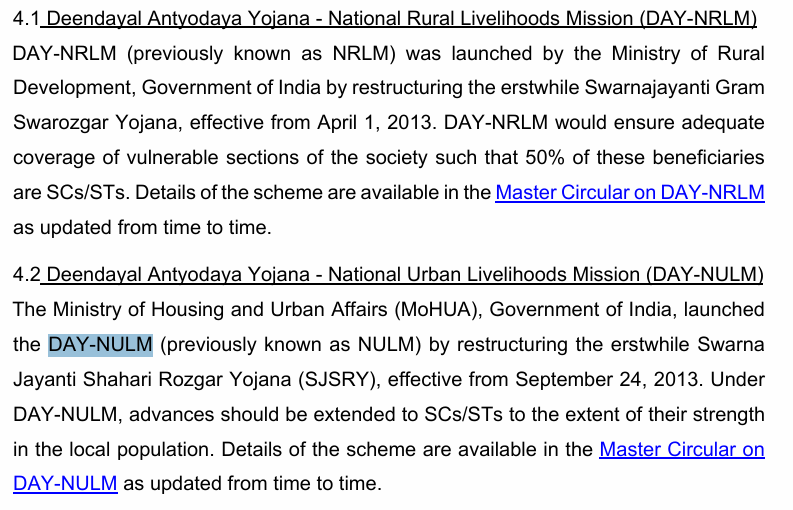

**Source:** *Master Circular - Credit facilities to Scheduled Castes (SCs) & Scheduled Tribes.pdf (Page 5)*

In [114]:
ask_query("what is the other name for DAY-NRLM? and explain me it's objectives?")

LLM Response:

DAY-NRLM is also known as Deendayal Antyodaya Yojana - National Rural Livelihoods Mission. The objectives of DAY-NRLM are to promote poverty reduction through building strong institutions of the poor, particularly women, and enabling these institutions to access a range of financial services and livelihoods.


Sources cited in the answer:
Source 1: Master Circular – Deendayal Antyodaya Yojana - National Rural Livelihoods Mission (DAY-NRLM).pdf (Page 2)
Source 2: Master Circular – Deendayal Antyodaya Yojana - National Rural Livelihoods Mission (DAY-NRLM).pdf (Page 12)
Source 3: Master Circular - Prudential norms on Income Recognition, Asset Classification and Provisioning pertaining to Advances.pdf (Page 71)
Source 4: Master Circular – Lead Bank Scheme.pdf (Page 49)
Source 5: Master Circular – Lead Bank Scheme.pdf (Page 2)


In [115]:
ask_query("What is my previous question?")

LLM Response:

I couldn’t find information related to this question according to the provided documents.


Sources cited in the answer:
Source 1: Master Circular – Deendayal Antyodaya Yojana - National Rural Livelihoods Mission (DAY-NRLM).pdf (Page 5)
Source 2: Master Circular – Basel III Capital Regulations.pdf (Page 13)
Source 3: Master Circular – Basel III Capital Regulations.pdf (Page 205)
Source 4: Master Circular – Basel III Capital Regulations.pdf (Page 115)
Source 5: Master Circular – Deendayal Antyodaya Yojana - National Rural Livelihoods Mission (DAY-NRLM).pdf (Page 28)


In [116]:
ask_query("Explain me about Day NRLM clearly.")

LLM Response:

DAY-NRLM is a flagship program of the Government of India aimed at promoting poverty reduction through building strong institutions for women and enabling them to access financial services and livelihoods. It adopts a demand-driven approach, allowing States to formulate their own State-specific poverty reduction action plans. The key features include specialized institutions like Livelihoods collectives, producers' cooperatives/companies, and the promotion of social accountability practices. These institutions are strengthened through partnerships with existing SHGs and federations formed by Government efforts and NGOs. The program aims to provide access to information, credit, technology, markets, and economies of scale for the poor. The Central allocation is distributed based on the incidence of poverty in the states, ensuring that resources reach areas most affected by poverty. Implementation involves full complement of trained professional staff in blocks, covering u